Python-Bibliotheken importieren - beim ersten Aufruf dauert das einen Moment
ListeQuelldateienLesen        .......................................................................................................................................................................................................................................................................................279 Dateien
GesamtquelldateiAnlegen       .......................................................................................................................................................................................................................................................................................279 Dateien
AnfangBisEndeAusschneiden     ...........................................................................................................................................................................................................................................................

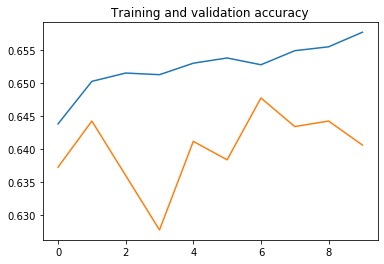

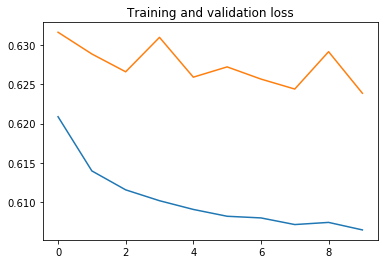

In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


def LogdateiOeffnen():
    # Legt eine Logdatei mit Zeitstempel im Dateinamen an, öffnet sie zum Schreiben
    # gibt das Dateiobjekt "PfadLogdateien" zurück, 
    # und dieses wird als globale Variable im Hauptprogramm abgelegt.
    Zeitstempel = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    Logdatei = open(PfadLogdateien+Zeitstempel+"Logdatei.txt","w")
    return Logdatei


# In[2]:


def ProgrammausgabeEinleiten(Text):
    # schreibt eine Überschrift für den beginnenden Programmteil in die Logdatei
    Logdatei.write("\n# ============================================\n")
    Logdatei.write(Text+"\n")
    Logdatei.write("# ============================================\n")
    # gibt die Überschrift für den beginnenden Programmteil am Bildschirm aus,
    # aber ohne Zeilenwechsel, damit anschließende Ausgaben auf derselben Zeile folgen
    sys.stdout.write(Text.ljust(30," "))


# In[3]:


def ProgrammausgabeBeenden(Text, Anfangszeit, Endezeit):
    # Am Ende eines Teilprogramms wird in der Logdatei protokolliert, 
    # wann das Programm begonnen und beendet wurde und wie lange das gedauert hat.
    # Das Dateiobjekt "Logatei" wurde als globale Variable im Hauptprogramm definiert.
    Dauer = Endezeit - Anfangszeit
    DauerInSek = round(Dauer.seconds,2)
    DauerInMin = round(Dauer.seconds/60,2)
    DauerInStd = round(Dauer.seconds/3600,2)
    StringAnfang = 'Programmstart: ' + str(Anfangszeit)
    StringEnde   = 'Programmende:  ' + str(Endezeit)
    StringDauer  = "Dauer: "   + str(DauerInSek) + " Sekunden = "
    StringDauer  = StringDauer + str(DauerInMin) + " Minuten = "
    StringDauer  = StringDauer + str(DauerInStd) + " Stunden"
    StringGesamt = StringAnfang + "\n" + StringEnde + "\n" + StringDauer + "\n" + Text + "\n"
    Logdatei.write(StringGesamt)
    # Am Bildschirm wird dagegen nur der Text ausgegeben, der diesem Programm übergeben wurde:
    print(Text)


# In[4]:


def ListeQuelldateienLesen ():
    # Aus einer csv-Datei wird gelesen, welche Originialtexte verarbeitet werden sollen,
    # zusammen mit der Information, welches Label sie bekommen und ob sie für Training und Validierung
    # oder nur für Test verwendet werden sollen.
    # Außerdem kann jeder Text Markierungen enthalten, die zeigen, dass Abschnitte am Anfang und am Ende des
    # Dokuments nicht zum auszuwertenden Text gehören.
    # Und schließlich enthält die Datei auch ein "aktiv"-Flag, mit dem gesteuert werden kann, ob der 
    # Text ignoriert werden soll.
    # Alle diese Informationen werden hier aus der Datei gelesen und in eine Python-Liste "Quellen"
    # geschrieben (aber nur für aktive Dateien), an der sich alle nachfolgenden Programme orientieren.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("ListeQuelldateienLesen")
    Quellendatei = open(Pfad+"00_Quellen.txt", "r")
    Quellen=[]
    ErsteZeile=True
    Zaehler=0
    for Zeile in Quellendatei:
        if ErsteZeile: ErsteZeile=False # die erste Zeile soll ignoriert werden, sie enthält Überschriften
        else: 
            Zaehler=Zaehler+1
            # ein Punkt pro Text soll auf dem Bildschirm erkennbar machen, dass das Programm arbeitet:
            sys.stdout.write(".") 
            Puffer=""
            Feld=0
            for i in Zeile:
                if ord(i)in [9,10]:
                    if Feld==0: Dateiname=Puffer
                    elif Feld==1: Label=Puffer
                    elif Feld==2: Verwendung=Puffer
                    elif Feld==3: Anfang=Puffer
                    elif Feld==4: Ende=Puffer
                    elif Feld==5: aktiv=Puffer
                    Feld=Feld+1
                    Puffer=""
                else:
                    Puffer=Puffer+i
            Puffer=[]
            Puffer.append(Dateiname)
            Puffer.append(Label)
            Puffer.append(Verwendung)
            Puffer.append(Anfang)
            Puffer.append(Ende)
            if aktiv=="1": Quellen.append(Puffer)
            else: Zaehler=Zaehler-1
    # Jetzt ist alles gelesen und in die Liste übertragen worden. Die Datei kann geschlossen werden:
    Quellendatei.close()
    # Das Ergebnis wird in die Logdatei protokolliert:
    for q in Quellen: Logdatei.write(q[0].ljust(60," ") + " " + q[1] + " " + q[2] + "\n" )
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+ " Dateien", Anfangszeit, Endezeit)
    return Quellen


# In[5]:


def GesamtquelldateiAnlegen():
    # Hier passiert noch keine richtige Verarbeitung. Sondern die einzelnen Quelldateien werden geöffnet, 
    # gesammelt in eine Gesamtdatei ("gd") sowie einzeln in erste Zwischenergebnis-Dateien 
    # <Dateiname>text1.txt" geschrieben.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("GesamtquelldateiAnlegen")
    gd = open(PfadZwischenergebnisse+"AllesInEinem.txt","w")
    Zaehler=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".") # damit man am Bildschirm mitkriegt, dass das Programm arbeitet
        Dateiname = Quelle[0]
        Verwendung = Quelle[2]
        f = open(PfadQuellen+Dateiname,"r", errors='ignore')
        Text1 = f.read()
        gd.write(Dateiname+chr(10)+chr(10))
        gd.write(Text1+chr(10)+chr(10))
        f.close
        g = open(PfadZwischenergebnisse+Dateiname+"_Text1.txt","w")
        g.write(Text1)
        g.close()
    gd.close()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[6]:


def AnfangBisEndeAusschneiden():
    # Die Zwischenergebnisse "<Dateiname>text1.txt" mit den noch unveränderten Texten werden geöffnet,
    # nach den Anfangs- und Endtexten durchsucht und der dazwischenliegende Text in
    # Zwischenergebnisse "<Dateiname>text2.txt" geschrieben.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("AnfangBisEndeAusschneiden")
    Zaehler=0
    # Die Liste der Quelldateien wird durchgegangen:
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        # diese Informationen werden aus der Liste der Quelldateien benötigt:
        Dateiname = Quelle[0]
        Anfangszaehler=0
        Anfang=Quelle[3]
        Endezaehler=0
        Ende=Quelle[4]
        # Die Originaldatei wird gelesen:
        f = open(PfadZwischenergebnisse+Dateiname+"_Text1.txt","r")
        Text1 = f.read()
        f.close
        # Der Text zwischen Anfang und Ende wird übernommen:
        Text2 = ""
        EndePuffer=""
        for i in Text1:
            # wenn noch nach dem Anfang gesucht wird:
            if Anfangszaehler<len(Anfang):
                if i==Anfang[Anfangszaehler]: Anfangszaehler=Anfangszaehler+1
                else: Anfangszaehler=0
            # wenn der Anfang bereits gefunden ist und kein Ende-Text vorliegt:
            elif len(Ende)==0: Text2 = Text2 + i
            # wenn der Ende-Text gefunden ist:
            elif i==Ende[Endezaehler]:
                EndePuffer = EndePuffer + i
                Endezaehler = Endezaehler + 1
                if Endezaehler==len(Ende): break
            # wenn der Anfang bereits gefunden ist und noch auf den Ende-Text gewartet wird:
            else:
                Text2 = Text2 + EndePuffer + i
                Endezaehler=0
                EndePuffer=""
        # Das Ergebnis wird geschrieben:
        g = open(PfadZwischenergebnisse+Dateiname+"_Text2.txt","w")
        g.write(Text2)
        g.close()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[7]:


def EinschuebeEntfernen():
    # Die Zwischenergebnisse "<Dateiname>text2.txt" werden geöffnet, es werden Einschübe entfernt 
    # und das Ergebnis in Dateien mit Namen Zwischenergebnisse "<Dateiname>text3.txt" geschrieben.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("EinschuebeEntfernen")
    Zaehler=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        Dateiname = Quelle[0]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text2.txt","r")
        Text2 = f.read()
        f.close
        Text3 = ""
        Einschubzaehler=0
        for i in Text2:
            if ord(i) in Einschub:
                Einschubzaehler=Einschubzaehler+1
                if Einschubzaehler==2: Einschubzaehler=0
            elif Einschubzaehler==1: pass
            else: Text3 = Text3 + i
        g = open(PfadZwischenergebnisse+Dateiname+"_Text3.txt","w")
        g.write(Text3)
        g.close()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[8]:


def ZeilenumbruecheBearbeiten():
    # Die Zwischenergebnisse "<Dateiname>text3.txt" werden geöffnet, 
    # es werden einfache Zeilenumbrüche entfernt (weil sie ja mitten in einem Satz stehen können)
    #  mehrfache werden durch einen einfachen ersetzt,
    # und das Ergebnis wird in Dateien mit Namen Zwischenergebnisse "<Dateiname>text4.txt" geschrieben.
    # Außerdem wird der Text zwischen zwei Zeilenumbrüchen weggelassen, wenn es zu wenig ist.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("ZeilenumbruecheBearbeiten")
    Zaehler=0
    MindestlaengeDazwischen = 20
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        Dateiname = Quelle[0]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text3.txt","r")
        Text3 = f.read()
        f.close
        Text4 = ""
        Puffer=""
        Zeilenumbruchzaehler=0
        dazwischenZaehler = 0
        for i in Text3:
            if ord(i)==10: 
                Zeilenumbruchzaehler=Zeilenumbruchzaehler+1
                dazwischenZaehler = 0
                if len(Puffer)>=MindestlaengeDazwischen: Text4 = Text4 + Puffer
                Puffer=""
            else:
                dazwischenZaehler = dazwischenZaehler + 1
                if Zeilenumbruchzaehler==0: Puffer = Puffer + i
                elif Zeilenumbruchzaehler==1:  Puffer = Puffer + " " + i
                else: Puffer = Puffer + chr(10) + i
                Zeilenumbruchzaehler=0
        if len(Puffer)>=MindestlaengeDazwischen: Text4 = Text4 + Puffer
        g = open(PfadZwischenergebnisse+Dateiname+"_Text4.txt","w")
        g.write(Text4)
        g.close()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[9]:


def WhitespacezeichenBearbeiten():
    # Die Zwischenergebnisse "<Dateiname>text4.txt" werden geöffnet, 
    # Aufeinanderfolgende Whitespace-Zeichen werden 
    # durch einfache Leerzeichen ersetzt, wenn sie keine Zeilenumbrüche enthalten,
    # und durch einfache Zeilenumbrüche, wenn sie Zeilenumbrüche enthalten.
    # Das Ergebnis wird in Dateien mit Namen "<Dateiname>text5.txt" geschrieben.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("WhitespacezeichenBearbeiten")
    Zaehler=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        Dateiname = Quelle[0]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text4.txt","r")
        Text4 = f.read()
        f.close
        Text5 = ""
        Zeilenumbruchzaehler=0
        Weissraumzaehler=0
        for i in Text4:
            if ord(i)==10: Zeilenumbruchzaehler=Zeilenumbruchzaehler+1
            if ord(i) in Weissraum: Weissraumzaehler=Weissraumzaehler+1
            else:
                if Weissraumzaehler>0:
                    if Zeilenumbruchzaehler==0: Text5 = Text5 + " "
                    else: Text5 = Text5 + chr(10)
                    Weissraumzaehler=0
                    Zeilenumbruchzaehler=0
                Text5 = Text5 + i
        g = open(PfadZwischenergebnisse+Dateiname+"_Text5.txt","w")
        g.write(Text5)
        g.close()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[10]:


def ZerlegenInSaetze():
    # Die Zwischenergebnisse "<Dateiname>text5.txt" werden geöffnet, der Text wird in Sätze zerlegt.
    # Die Sätze werden zusätzlich durch zweifache Zeilenumbrüche getrennt, um sie optisch besser erkennbar zu machen.
    # Denn sie werden erst noch einmal in Dateien zurückgeschrieben, um dort geprüft werden zu können.
    # Die Sätze werden in Zwischenergebnisse "<Dateiname>text6.txt" geschrieben.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("ZerlegenInSaetze")
    Zaehler=0
    SaetzeGesamt=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        SaetzeDatei=0
        Dateiname = Quelle[0]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text5.txt","r")
        Text5 = f.read()
        f.close
        Text6 = ""
        # damit z.B. Leerzeichen nach einem Satztrenner entfernt werden können, 
        # merkt sich das nachfolgende Flag, ob vorher ein Satztrenner kam:
        NeuerSatzFlag=0 
        for i in Text5:
            # Wenn gerade ein Satz anfängt, muss unterschieden werden, ob ein Leerzeichen oder etwas anderes kommt:
            if NeuerSatzFlag==1: 
                if ord(i)==32: pass
                elif ord(i)==10: pass
                else: Text6 = Text6 + i
                NeuerSatzFlag=0
            elif ord(i)==10: # wenn ein Zeilenumbruch statt eines Satztrenners kommt
                Text6 = Text6 + chr(10)+chr(10)
                NeuerSatzFlag=1
                SaetzeDatei = SaetzeDatei + 1
            elif ord(i) in Satztrenner: # wenn ein Satztrenner kommt
                # Der Satztrenner selber wird weggelassen:
                Text6 = Text6 + chr(10)+chr(10)
                NeuerSatzFlag=1
                SaetzeDatei = SaetzeDatei + 1
            else: Text6 = Text6 + i
        g = open(PfadZwischenergebnisse+Dateiname+"_Text6.txt","w")
        g.write(Text6)
        g.close()
        SaetzeGesamt = SaetzeGesamt + SaetzeDatei
        Logdatei.write(str(SaetzeDatei).rjust(6," ") + " Sätze in " + Dateiname + "\n")
    String = "------ ----- -- ---------- \n"
    Logdatei.write(String)
    String = str(SaetzeGesamt).rjust(6," ") + " Sätze in "
    String = String + str(len(Quellen)) + " Dateien" + "\n"
    Logdatei.write(String)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[11]:


def SaetzePruefen():
    # Die Zwischenergebnisse "<Dateiname>text6.txt" mit den bereits separierten Sätzen werden geöffnet.
    # Großbuchstaben werden durch Kleinbuchstaben ersetzt.
    # Jeder Satz wird zeichenweise darauf geprüft, 
    # ob er Zeichen enthält, die nahelegen, diesen Satz nicht zu verwenden.
    # Auch zu kurze Sätze werden aussortiert.
    # Die aussortierten Sätze in Zwischenergebnisse "<Dateiname>text7.txt" geschrieben und
    # die für gut befundenen und standardisierten Sätze in Zwischenergebnisse "<Dateiname>text8.txt".
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("SaetzePruefen")
    Zaehler=0
    if Satztyp == 1: minSatzlaenge=50
    else:            minSatzlaenge=20
    SaetzeGesamtOK=0
    SaetzeGesamtNOK=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        SaetzeDateiOK=0
        SaetzeDateiNOK=0
        Dateiname = Quelle[0]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text6.txt","r")
        Text6 = f.read()
        f.close
        Text7 = "" # für die aussortierten Sätze
        Text8 = "" # für die für gut befundenen Sätze
        # Weil die Sätze ja immer durch zwei aufeinanderfolgende Zeilenumbrüche getrennt sind,
        # wird ein Zähler für Zeilenumbrüche benötigt:
        Zeilenumbruchzaehler=0 
        Puffer=""
        for i in Text6:
            if ord(i)==10:
                Zeilenumbruchzaehler=Zeilenumbruchzaehler+1
                if Zeilenumbruchzaehler==1:
                    # den Satz zeichenweise prüfen
                    SatzOkFlag=True
                    Puffertmp=Puffer
                    Puffer=""
                    for j in range(len(Puffertmp)):
                        k=ord(Puffertmp[j])
                        if k>=65 and k<=90: Puffer=Puffer+chr(k+32) # Grosse in kleine Buchstaben ändern
                        elif k>=97 and k<=122: Puffer=Puffer+Puffertmp[j] # Kleine Buchstaben übernehmen
                        # elif k>=48 and k<=57: Puffer=Puffer+Puffertmp[j] # Ziffern übernehmen?
                        elif k in [32, 44]: Puffer=Puffer+Puffertmp[j] # Leerzeichen, Komma: übernehmen
                        # elif k in [40, 41]: Puffer=Puffer+Puffertmp[j] # Normale Klammern: übernehmen
                        elif k in keinSatztrenner: Puffer=Puffer+Puffertmp[j] # übernehmen
                        elif k in Satztrenner: Puffer=Puffer+Puffertmp[j] 
                        else:
                            # Offenbar enthält der Satz noch andere Zeichen. Der Satz wird zwar fertig kopiert, 
                            # aber er wird zum Aussortieren markiert:
                            SatzOkFlag=False
                            Puffer=Puffer+Puffertmp[j]+"<unbekannt>"
                    # Auch wenn der Satz die Mindestlänge unterschreitet, wird er aussortiert, weil dann
                    # die Wahrscheinlichkeit höher ist, dass es gar kein richtiger Satz ist:
                    if len(Puffer)<minSatzlaenge: SatzOkFlag=False
                    # den Zeilenumbruch anhängen
                    Puffer = Puffer + i
                elif Zeilenumbruchzaehler==2:
                    # den Satz in die Dateien verteilen
                    Puffer = Puffer + i
                    if SatzOkFlag==True: 
                        Text8 = Text8 + Puffer
                        SaetzeDateiOK = SaetzeDateiOK + 1
                    else: 
                        Text7 = Text7 + Puffer
                        SaetzeDateiNOK = SaetzeDateiNOK + 1
                    Puffer="" 
            else:
                Puffer = Puffer + i
                Zeilenumbruchzaehler=0
        g = open(PfadZwischenergebnisse+Dateiname+"_Text7.txt","w")
        g.write(Text7)
        g.close()
        h = open(PfadZwischenergebnisse+Dateiname+"_Text8.txt","w")
        h.write(Text8)
        h.close()
        String =          str(SaetzeDateiOK).rjust(6," ") + " + "
        String = String + str(SaetzeDateiNOK).rjust(6," ") + " = "
        String = String + str(SaetzeDateiOK + SaetzeDateiNOK).rjust(6," ")
        String = String + " Sätze in " + Dateiname + "\n"
        Logdatei.write(String)
        SaetzeGesamtOK = SaetzeGesamtOK + SaetzeDateiOK
        SaetzeGesamtNOK = SaetzeGesamtNOK + SaetzeDateiNOK
    String =          str(SaetzeGesamtOK).rjust(6," ") + " + "
    String = String + str(SaetzeGesamtNOK).rjust(6," ") + " = "
    String = String + str(SaetzeGesamtOK + SaetzeGesamtNOK).rjust(6," ") + " Sätze insgesamt\n"
    Logdatei.write(String)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)


# In[12]:


def SaetzeZuPythonlisten ():
    # Die Zwischenergebnisse "<Dateiname>text8.txt" werden geöffnet und 
    # zur Weiterverwendung für die Modelle werden diese Sätze mit ihren Labeln in Python-Listen geschrieben.
    # Dass sie außerdem erneut in Dateien geschrieben ("<Dateiname>text9.txt) werden, dient nur dazu,
    # überprüfen zu können, was das Programm getan hat.
    # Das Ergebnis sind vier Python-Listen:
    # SatzLabelVorrat1: Sätze mit Label 1 für Training und Validierung
    # SatzLabelVorrat2: Sätze mit Label 2 für Training und Validierung
    # SatzLabelVorratT: Sätze für den Test
    # SatzLabelVorratProDatei: die Liste enthält je eine Liste mit Sätzen aus der jeweiligen Originaldatei
    # Diese vier Listen werden an das Hauptprogramm zurückgegeben und weiterverarbeitet.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("SaetzeZuPythonlisten")
    Zaehler=0
    SatzLabelVorrat1=[] # die Sätze für Training und Validierung mit Label 1
    SatzLabelVorrat2=[] # die Sätze für Training und Validierung mit Label 2
    SatzLabelVorratT=[] # die Sätze für den Test
    # Zusätzlich werden solche Listen pro Datei in diese Liste geschrieben:
    SatzLabelVorratProDatei=[]
    SatzzaehlerGesamt=0
    for Quelle in Quellen:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        SatzzaehlerDatei=0
        Dateiname = Quelle[0]
        DateiLabel = Quelle[1]
        Verwendung = Quelle[2]
        # In dieser Liste werden die Satz-Label-Paare pro Datei gesammelt, 
        # um anschließend an SatzLabelVorratProDatei übergeben zu werden:
        SatzLabelVorratTemp=[]
        f = open(PfadZwischenergebnisse+Dateiname+"_Text8.txt","r")
        Text8 = f.read()
        f.close
        Zeilenumbruchzaehler=0 # Weil die Sätze ja immer durch zwei aufeinanderfolgende Zeilenumbrüche getrennt sind
        Puffer=""
        Text9=""
        for i in Text8:
            if ord(i)==10:
                Zeilenumbruchzaehler=Zeilenumbruchzaehler+1
                if Zeilenumbruchzaehler==1:
                    # den Satz in die Listen schreiben
                    Liste=[]
                    Liste.append(Puffer)
                    Liste.append(DateiLabel)
                    # Verteilung an die Listen pro Verwendungszweck:
                    if Verwendung=="T": SatzLabelVorratT.append(Liste)
                    elif DateiLabel=='1': SatzLabelVorrat1.append(Liste)
                    else: SatzLabelVorrat2.append(Liste)
                    # Zusätzlich für die Listen pro Datei:
                    SatzLabelVorratTemp.append(Liste)
                    SatzzaehlerDatei=SatzzaehlerDatei+1
                    Text9 = Text9 + Puffer + chr(10) + chr(10)
                    # den Puffer leeren:
                    Puffer="" 
                else:
                    pass
            else:
                Puffer = Puffer + i
                Zeilenumbruchzaehler=0
        g = open(PfadZwischenergebnisse+Dateiname+"_Text9.txt","w")
        g.write(Text9)
        g.close()
        Liste=[]
        Liste.append(Dateiname)
        Liste.append(SatzLabelVorratTemp)
        SatzLabelVorratProDatei.append(Liste)
        String = str(SatzzaehlerDatei).rjust(6," ")
        if Verwendung == "TrV": String = String + " Sätze für Label " + DateiLabel
        else:                   String = String + " Sätze für Test   "
        String = String + " in " + Dateiname + "\n"
        Logdatei.write(String)
        SatzzaehlerGesamt = SatzzaehlerGesamt + SatzzaehlerDatei
    String = str(SatzzaehlerGesamt).rjust(6," ") + " Sätze insgesamt in " + str(len(Quellen)) + " Dateien\n"
    Logdatei.write(String)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+" Dateien", Anfangszeit, Endezeit)
    return SatzLabelVorrat1, SatzLabelVorrat2, SatzLabelVorratT, SatzLabelVorratProDatei


# In[13]:


def DatenAufteilen ():
    # Die Sätze für Training und Validierung werden jetzt in einem vorgegebenen Verhältnis aufgeteilt
    # in Sätze für das Training und Sätze für die Validierung.
    # Aus der Liste SatzLabelVorrat1 werden die zwei Listen SatzLabelVorrat1Tr und SatzLabelVorrat1V
    # Aus der Liste SatzLabelVorrat2 werden die zwei Listen SatzLabelVorrat2Tr und SatzLabelVorrat2V
    # Die Liste SatzLabelVorratT bleibt unverändert, ebenso die Liste SatzLabelVorratProDatei der Listen pro Datei.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("DatenAufteilen")
    Logdatei.write(str(len(SatzLabelVorrat1)).rjust(6," ") + " Sätze für Training und Validierung mit Label 1\n")
    Logdatei.write(str(len(SatzLabelVorrat2)).rjust(6," ") + " Sätze für Training und Validierung mit Label 2\n")
    Logdatei.write(str(len(SatzLabelVorratT)).rjust(6," ") + " Sätze zum Test\n")
    String = "Aufteilung Training / Validierung: " + str(Datenaufteilung[0]) 
    String = String + "/" + str(Datenaufteilung[1]) + "\n"
    Logdatei.write(String)
    SatzLabelVorrat1Tr=[]
    SatzLabelVorrat2Tr=[]
    SatzLabelVorrat1V=[]
    SatzLabelVorrat2V=[]
    TrZaehler=0
    VZaehler=0
    for s in SatzLabelVorrat1:
        if TrZaehler<Datenaufteilung[0]: 
            SatzLabelVorrat1Tr.append(s)
            TrZaehler=TrZaehler+1
        elif VZaehler<Datenaufteilung[1]:
            SatzLabelVorrat1V.append(s)
            VZaehler=VZaehler+1
            if VZaehler==Datenaufteilung[1]:
                TrZaehler=0
                VZaehler=0
    TrZaehler=0
    VZaehler=0
    for s in SatzLabelVorrat2:
        if TrZaehler<Datenaufteilung[0]: 
            SatzLabelVorrat2Tr.append(s)
            TrZaehler=TrZaehler+1
        elif VZaehler<Datenaufteilung[1]:
            SatzLabelVorrat2V.append(s)
            VZaehler=VZaehler+1
            if VZaehler==Datenaufteilung[1]:
                TrZaehler=0
                VZaehler=0
    Logdatei.write(str(len(SatzLabelVorrat1Tr)).rjust(6," ") + " Sätze mit Label 1 für Training\n")
    Logdatei.write(str(len(SatzLabelVorrat1V)).rjust(6," ") + " Sätze mit Label 1 für Validierung\n")
    Logdatei.write(str(len(SatzLabelVorrat2Tr)).rjust(6," ") + " Sätze mit Label 2 für Training\n")
    Logdatei.write(str(len(SatzLabelVorrat2V)).rjust(6," ") + " Sätze mit Label 2 für Validierung\n")
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return SatzLabelVorrat1Tr, SatzLabelVorrat1V, SatzLabelVorrat2Tr, SatzLabelVorrat2V


# In[14]:


def DatenZusammenfuehren ():
    # Die Sätze wurden bis jetzt getrennt nach Labeln verarbeitet.
    # Sie werden jetzt zusammengeführt. Das Ergebnis ist:
    # SatzLabelVorratTr mit Sätzen und Labeln für das Training
    # SatzLabelVorratV mit Sätzen und Labeln für die Validierung
    # Nicht verändert haben sich dagegen die Liste 
    # SatzLabelVorratT für den Test und die Liste der Listen pro Datei.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("DatenZusammenfuehren")
    SatzLabelVorratTr = SatzLabelVorrat1Tr + SatzLabelVorrat2Tr
    SatzLabelVorratV = SatzLabelVorrat1V + SatzLabelVorrat2V
    Logdatei.write(str(len(SatzLabelVorratTr)).rjust(6," ") + " Sätze und Label für Training\n")
    Logdatei.write(str(len(SatzLabelVorratV)).rjust(6," ") + " Sätze und Label für Validierung\n")
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return SatzLabelVorratTr, SatzLabelVorratV


# In[15]:


def LabelInNumpyArrays ():
    # Sätze und Label standen bisher zusammen in gemeinsamen Listen.
    # Sie werden jetzt in getrennt Listen geschrieben, 
    # und die Label-Listen müssen in Numpy-Arrays umgewandelt werden.
    # Im Ergebnis gibt es:
    # für das Training die Liste SaetzeTr und den Array LabelTr,
    # für die Validierung die Liste SaetzeV und den Array LabelV,
    # für den Test die Liste SaetzeT und den Array LabelT,
    # und pro Datei in SaetzeLabelProDatei eine Liste von Sätzen und ein Array mit Labeln.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("LabelInNumpyArrays")
    SaetzeTr=[]
    LabelListeTr=[]
    for i in SatzLabelVorratTr: 
        SaetzeTr.append(i[0])
        LabelListeTr.append(i[1])
    SaetzeV=[]
    LabelListeV=[]
    for i in SatzLabelVorratV:
        SaetzeV.append(i[0])
        LabelListeV.append(i[1])
    SaetzeT=[]
    LabelListeT=[]
    for i in SatzLabelVorratT: 
        SaetzeT.append(i[0])
        LabelListeT.append(i[1])
    # Die Label müssen außerdem als Arrays vorliegen.
    # Der Datentyp float des Arrays ist wichtig für model.fit:
    LabelTr = np.array(LabelListeTr,dtype=float)
    LabelV = np.array(LabelListeV,dtype=float)
    LabelT = np.array(LabelListeT,dtype=float)
    Logdatei.write("Sätze für Training:    " + str(len(SaetzeTr)).rjust(6," ") + "\n")
    Logdatei.write("Sätze für Validierung: " + str(len(SaetzeV)).rjust(6," ") + "\n")
    Logdatei.write("Sätze für Test:        " + str(len(SaetzeT)).rjust(6," ") + "\n")
    Logdatei.write("Label für Training:    " + str(LabelTr.shape) + "\n")
    Logdatei.write("Label für Validierung: " + str(LabelV.shape) + "\n")
    Logdatei.write("Label für Test:        " + str(LabelT.shape)+ "\n")
    # Das gleiche geschieht mit den Listen pro Datei, die in SatzLabelVorratProDatei liegen:
    SaetzeLabelProDatei=[]
    for i in SatzLabelVorratProDatei: # i ist eine Liste mit Dateiname und Satz-Label-Liste für eine Datei.
        Liste=[]
        Liste.append(i[0]) # Das ist der Dateiname.
        ListeSaetze=[]
        ListeLabel=[]
        for j in i[1]: # j ist eine Liste von Satz/Label-Paaren
            ListeSaetze.append(j[0])
            ListeLabel.append(j[1])
        Liste.append(ListeSaetze)
        Liste.append(np.array(ListeLabel,dtype=float))
        SaetzeLabelProDatei.append(Liste)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return SaetzeTr, LabelTr, SaetzeV, LabelV, SaetzeT, LabelT, SaetzeLabelProDatei


# In[16]:


def TokenizerUndPadding ():
    # Die Satzlisten werden in Arrays von Zahlenwerten pro Wort umgewandelt. 
    # Im Ergebnis liegen nun vor:
    # paddedTr (und schon bisher LabelTr) für das Training, 
    # paddedV (und schon bisher LabelV) für die Validierung, 
    # paddedT (und schon bisher LabelT) für den Test,
    # außerdem SaetzeLabelProDateiPadded mit Satz- und Label-Arrays pro Originaldatei.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("TokenizerUndPadding")
    sys.stdout.write(".")
    tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
    sys.stdout.write(".")
    tokenizer.fit_on_texts(SaetzeTr)
    sys.stdout.write(".")
    word_index = tokenizer.word_index
    # Die WortListe brauche ich, um zu einem Index das Wort zu finden:
    sys.stdout.write(".")
    WortListe=[]
    sys.stdout.write(".")
    for i in word_index:
        WortListe.append(i)
    sys.stdout.write(".")
    sequencesTr = tokenizer.texts_to_sequences(SaetzeTr)
    sys.stdout.write(".")
    paddedTr = pad_sequences(sequencesTr,maxlen=max_length)
    sys.stdout.write(".")
    sequencesV = tokenizer.texts_to_sequences(SaetzeV)
    sys.stdout.write(".")
    paddedV = pad_sequences(sequencesV,maxlen=max_length)
    sys.stdout.write(".")
    sequencesT = tokenizer.texts_to_sequences(SaetzeT)
    sys.stdout.write(".")
    paddedT = pad_sequences(sequencesT,maxlen=max_length)
    sys.stdout.write(".")
    String = "Array " + str(paddedTr.shape) + " mit Sätzen und Array " 
    String = String + str(LabelTr.shape) + " mit Labeln für das Training\n"
    Logdatei.write(String)
    String = "Array " + str(paddedV.shape) + " mit Sätzen und Array " 
    String = String + str(LabelV.shape) + " mit Labeln für die Validierung\n"
    Logdatei.write(String)
    String = "Array " + str(paddedT.shape) + " mit Sätzen und Array " 
    String = String + str(LabelT.shape) + " mit Labeln für den Test\n"
    Logdatei.write(String)
    # Das gleiche noch mit den Listen pro Datei:
    SaetzeLabelProDateiPadded=[]
    for i in SaetzeLabelProDatei:
        sys.stdout.write(".")
        Liste=[]
        Liste.append(i[0])
        sequencesD = tokenizer.texts_to_sequences(i[1])
        paddedD = pad_sequences(sequencesD,maxlen=max_length)
        Liste.append(paddedD)
        Liste.append(i[2])
        SaetzeLabelProDateiPadded.append(Liste)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return paddedTr, paddedV, paddedT, SaetzeLabelProDateiPadded, word_index


# In[17]:


def DatenNormieren ():
    # Die Wörter in den Sätzen sind durch Zahlen zwischen 1 und voc_size dargestellt.
    # Sie werden normiert auf kleinere Zahlen.
    # Die Label haben die Werte 1 und 2. Für die Modelle werden die Werte 0 und 1 benötigt.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("DatenNormieren")
    NormFaktor = vocab_size/10
    paddedTrNorm = paddedTr / NormFaktor
    paddedVNorm = paddedV / NormFaktor
    paddedTNorm = paddedT / NormFaktor
    LabelTrNorm = LabelTr - 1
    LabelVNorm = LabelV - 1
    LabelTNorm = LabelT - 1
    SaetzeLabelProDateiPaddedNorm=[]
    for i in SaetzeLabelProDateiPadded:
        Liste=[]
        Liste.append(i[0])
        Liste.append(i[1]/NormFaktor)
        Liste.append(i[2]-1)
        SaetzeLabelProDateiPaddedNorm.append(Liste)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return paddedTrNorm, paddedVNorm, paddedTNorm, LabelTrNorm, LabelVNorm, LabelTNorm, SaetzeLabelProDateiPaddedNorm


# In[18]:


def DatenFuerConv ():
    # Für Modelle mit Convolution müssen die Arrays noch umgeformt werden.
    # Das wird unter abweichendem Namen abgelegt, damit beiderlei Daten für die 
    # Modell verfügbar bleiben:
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("DatenFuerConv")
    paddedTrNormConv = paddedTrNorm.reshape(len(paddedTrNorm), max_length, 1)
    paddedVNormConv = paddedVNorm.reshape(len(paddedVNorm), max_length, 1)
    paddedTNormConv = paddedTNorm.reshape(len(paddedTNorm), max_length, 1)
    SaetzeLabelProDateiPaddedNormConv=[]
    for i in SaetzeLabelProDateiPaddedNorm:
        Liste=[]
        Liste.append(i[0])
        Liste.append(i[1].reshape(len(i[1]), max_length, 1))
        Liste.append(i[2])
        SaetzeLabelProDateiPaddedNormConv.append(Liste)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return paddedTrNormConv, paddedVNormConv, paddedTNormConv, SaetzeLabelProDateiPaddedNormConv


# In[19]:


def Modell_11_Vorbereiten ():
    # Minimalmodell nach Kurs 1, Woche 1, deshalb "11"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_11_Vorbereiten")
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[max_length])])
    model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
    print(" ")
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=1 
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[20]:


def Modell_11_Trainieren (Epochen):
    # Minimalmodell nach Kurs 1, Woche 1, deshalb "11"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_11_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, LabelTrNorm, epochs=Epochen, validation_data=(paddedVNorm, LabelVNorm))
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[21]:


def Modell_12_Vorbereiten ():
    # reine dense-Layer, aber mehrere Layer und mehr Neuronen nach Kurs 1, Woche 2, deshalb "12"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_12_Vorbereiten")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(" ")
    print("Training mit einer Epoche, weil das Summary danach ein Training verlangt.")
    print(" Das eigentliche Training kommt später.")
    history = model.fit(paddedTrNorm, LabelTrNorm, epochs=1, validation_data=(paddedVNorm, LabelVNorm))
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=2
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[22]:


def Modell_12_Trainieren (Epochen):
    # reine dense-Layer, aber mehrere Layer und mehr Neuronen nach Kurs 1, Woche 2, deshalb "12"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_12_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, LabelTrNorm, epochs=Epochen, validation_data=(paddedVNorm, LabelVNorm))
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[23]:


def Modell_13_Vorbereiten ():
    # Modell mit Convolutions nach Kurs 1, Woche 3, deshalb "13"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_13_Vorbereiten")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, (5), activation='relu', input_shape=(max_length, 1)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, (5), activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=2 
    mitConvolution=True
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[24]:


def Modell_13_Trainieren (Epochen):
    # Modell mit Convolutions nach Kurs 1, Woche 3, deshalb "13"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_13_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    # hier werden die Daten in der für Convolutions gedachten abweichenden Form verwendet:
    history = model.fit(paddedTrNormConv, 
                        LabelTrNorm, 
                        epochs=Epochen, 
                        validation_data=(paddedVNormConv, LabelVNorm))
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[25]:


def Modell_14_Vorbereiten ():
    # DNN-Modell mit anderem Optimizer nach Kurs 1, Woche 4, deshalb "14"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_14_Vorbereiten")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    from tensorflow.keras.optimizers import RMSprop
    model.compile(optimizer=RMSprop(lr=0.001),
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(paddedTrNorm, 
                        LabelTrNorm, 
                        epochs=1, 
                        validation_data=(paddedVNorm, LabelVNorm))
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=2 
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[26]:


def Modell_14_Trainieren (Epochen):
    # DNN-Modell mit anderem Optimizer nach Kurs 1, Woche 4, deshalb "14"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_14_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, 
                        LabelTrNorm, 
                        epochs=Epochen, 
                        validation_data=(paddedVNorm, LabelVNorm))
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[27]:


def Modell_32_Vorbereiten ():
    # Modell mit Word-Embedding nach Kurs 3, Woche 2, deshalb "32"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_32_Vorbereiten")
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        # tf.keras.layers.GlobalAveragePooling1D(),
        # Oder:
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=1
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[28]:


def Modell_32_Trainieren (Epochen):
    # Modell mit Word-Embedding nach Kurs 3, Woche 2, deshalb "32"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_32_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, 
              LabelTrNorm, 
              epochs=Epochen,
              validation_data=(paddedVNorm, LabelVNorm))
    Modell_3x_EmbeddingsExportieren()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[29]:


def Modell_3x_EmbeddingsExportieren ():
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    e = model.layers[0]
    weights = e.get_weights()[0]
    out_v = io.open(PfadPlusPraefix+"vecs.tsv", 'w', encoding='utf-8')
    out_m = io.open(PfadPlusPraefix+"meta.tsv", 'w', encoding='utf-8')
    for word_num in range(1, vocab_size):
        word = reverse_word_index[word_num]
        embeddings = weights[word_num]
        out_m.write(word + "\n")
        out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    out_v.close()
    out_m.close()


# In[30]:


def Modell_33_Vorbereiten ():
    # Modell mit Word-Embedding und bidirektionalem LSTM nach Kurs 3, Woche 3, deshalb "33"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_33_Vorbereiten")
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=1
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[31]:


def Modell_33_Trainieren (Epochen):
    # Modell mit Word-Embedding und bidirektionalem LSTM nach Kurs 3, Woche 3, deshalb "33"
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_33_Trainieren")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, 
              LabelTrNorm, 
              epochs=Epochen,
              validation_data=(paddedVNorm, LabelVNorm))
    Modell_3x_EmbeddingsExportieren()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[32]:


def Modell_51_Vorbereiten ():
    # reine dense-Layer, aber mehrere Layer und mehr Neuronen nach Kurs 1, Woche 2, deshalb "12"
    # Variante mit extrem großen oder zahlreichen Layern
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_51_Vorbereiten (großes DNN)")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    Logdatei.write("10 Layer mit 2 hoch 10 Neuronen\n")
    print("10 Layer mit 2 hoch 10 Neuronen")
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    print(" ")
    print("KEIN Training mit einer Epoche für das Summary, um Zeit zu sparen.")
    print("Dafür auch kein Summary.")
    anzAusgabewerte=2
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[33]:


def Modell_51_Trainieren (Epochen):
    # reine dense-Layer, aber mehrere Layer und mehr Neuronen nach Kurs 1, Woche 2, deshalb "12"
    # Variante mit extrem großen oder zahlreichen Layern
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("Modell_51_Trainieren (großes DNN)")
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, LabelTrNorm, epochs=Epochen, validation_data=(paddedVNorm, LabelVNorm))
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[1]:


def Modell_52_Vorbereiten ():
    # Modell mit Word-Embedding und bidirektionalem LSTM nach Kurs 3, Woche 3, deshalb "33"
    Anfangszeit = datetime.datetime.now()
    String = "Modell_52_Vorbereiten:\n"
    String = String + "Word-Embedding, 2x Bidirectional LSTM, 2x Dense, 2 Ausgabewerte"
    ProgrammausgabeEinleiten(String)
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    # wird später abgefragt, um zu entscheiden, welche Auswertungen mit welchen Daten funktionieren werden:
    anzAusgabewerte=2
    mitConvolution=False
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return model, anzAusgabewerte, mitConvolution


# In[59]:


def Modell_52_Trainieren (Epochen):
    # Modell mit Word-Embedding und bidirektionalem LSTM nach Kurs 3, Woche 3, deshalb "33"
    Anfangszeit = datetime.datetime.now()
    String = "Modell_52_Trainieren:\n"
    String = String + "Word-Embedding, 2x Bidirectional LSTM, 2x Dense, 2 Ausgabewerte"
    ProgrammausgabeEinleiten(String)
    Logdatei.write(str(Epochen)+" Epochen\n")
    print(" ")
    history = model.fit(paddedTrNorm, 
              LabelTrNorm, 
              epochs=Epochen,
              validation_data=(paddedVNorm, LabelVNorm))
    # Funktioniert nicht, Ursache ungeklärt:
    # Modell_3x_EmbeddingsExportieren()
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)
    return history


# In[43]:


def TrainingsverlaufAuswerten ():
    # Hier werden pro Epoche Loss und Accuracy in die Logdatei protokolliert.
    # Außerdem werden die Werte am Bildschirm graphisch dargestellt.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("TrainingsverlaufAuswerten")
    String =          "Epoche".rjust(8," ")+"  "
    String = String + "loss".ljust(8," ")+"  "
    String = String + "accuracy".ljust(8," ")+"  "
    String = String + "val_loss".ljust(8," ")+"  "
    String = String + "val_accuracy".ljust(8," ")+"  "
    String = String +"\n"
    Logdatei.write(String)
    for i in history.epoch:
        String =          str(i).rjust(8," ")+"  "
        String = String + str(round(history.history['loss'][i],4)).ljust(8," ")+"  "
        String = String + str(round(history.history['accuracy'][i],4)).ljust(8," ")+"  "
        String = String + str(round(history.history['val_loss'][i],4)).ljust(8," ")+"  "
        String = String + str(round(history.history['val_accuracy'][i],4)).ljust(8," ")+"  "
        String = String +"\n"
        Logdatei.write(String)
    acc      = history.history[     'accuracy' ]
    val_acc  = history.history[ 'val_accuracy' ]
    loss     = history.history[    'loss' ]
    val_loss = history.history['val_loss' ]
    epochs   = range(len(acc))
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.figure()
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden("", Anfangszeit, Endezeit)


# In[44]:


def StreubereichProDatei ():
    # Pro Originaldatei wird ermittelt, zwischen welchen Extremwerten die Ergebnisse pro Satz streuen
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("StreubereichProDatei")
    Zaehler=0
    if mitConvolution==False: tempArray=SaetzeLabelProDateiPaddedNorm
    else:                      tempArray=SaetzeLabelProDateiPaddedNormConv
    for i in tempArray:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        if len(i[1])==0:
            Logdatei.write(i[0].ljust(50," ") + "keine Sätze gefunden\n")
        else:
            x = model.predict(i[1])
            y = []
            for j in x: y.append(j[0])
            String = i[0].ljust(60," ") + str(x.shape).rjust(10," ") + " "
            String = String + str(min(y)).ljust(20," ") + str(max(y)).ljust(20," ") + "\n"
            Logdatei.write(String)
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+ " Dateien", Anfangszeit, Endezeit)


# In[45]:


def EvaluateProDatei ():
    # Pro Originaldatei wird das Modell auf dessen Sätze angewandt.
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("EvaluateProDatei")
    Zaehler=0
    Breite = [60, 10]
    String0 = "Evaluierung pro Datei:".ljust(Breite[0]," ")
    String1 = "loss".ljust(Breite[1], " ")
    String2 = "accuracy".ljust(Breite[1]," ")
    Logdatei.write(String0 + String1 + String2 + "\n")
    String0 = "----------------------------------------".ljust(Breite[0]," ")
    String1 = "-----".ljust(Breite[1], " ")
    String2 = "-----".ljust(Breite[1], " ")
    Logdatei.write(String0 + String1 + String2 + "\n")
    if mitConvolution == False:
        for i in SaetzeLabelProDateiPaddedNorm:
            Zaehler = Zaehler + 1
            sys.stdout.write(".")
            if len(i[1])==0:
                Logdatei.write(i[0].ljust(Breite[0]," ") + "- keine Sätze gefunden\n")
            else:
                x = model.evaluate(i[1], i[2], verbose=0)
                String0 = i[0].ljust(Breite[0]," ")
                String1 = str(round(x[0],4)).ljust(Breite[1], " ")
                String2 = str(round(x[1],4)).ljust(Breite[1], " ")
                Logdatei.write(String0 + String1 + String2 + "\n")
    else:
        for i in SaetzeLabelProDateiPaddedNormConv:
            sys.stdout.write(".")
            Zaehler = Zaehler + 1
            if len(i[1])==0:
                Logdatei.write(i[0].ljust(Breite[0]," ") + "- keine Sätze gefunden\n")
            else:
                x = model.evaluate(i[1], i[2], verbose=0)
                String0 = i[0].ljust(Breite[0]," ")
                String1 = str(round(x[0],4)).ljust(Breite[1], " ")
                String2 = str(round(x[1],4)).ljust(Breite[1], " ")
                Logdatei.write(String0 + String1 + String2 + "\n")
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+ " Dateien", Anfangszeit, Endezeit)


# In[46]:


def EigeneAuswertung (Schwelle):
    # Pro Originaldatei wird ermittelt, in wievielen Sätzen das Modell klar für ein Label entscheidet, und
    # in wievielen es unsicher ist:
    Anfangszeit = datetime.datetime.now()
    ProgrammausgabeEinleiten("EigeneAuswertung mit Schwelle " + str(Schwelle) + " ")
    Breite = [60, 6]
    Zaehler=0
    String0 = "pro Datei: wieviele der Sätze werden wie eingestuft?".ljust(Breite[0]," ")
    String1 = "alt".rjust(Breite[1], " ")
    String3 = "unent.".rjust(Breite[1], " ")
    String5 = "neu".rjust(Breite[1], " ")
    Logdatei.write(String0 + String1 + String3 + String5 + "\n")
    String0 = "========================================".ljust(Breite[0]," ")
    String1 = "=====".rjust(Breite[1], " ")
    String3 = "=====".rjust(Breite[1], " ")
    String5 = "=====".rjust(Breite[1], " ")
    Logdatei.write(String0 + String1 + String3 + String5 + "\n")
    if mitConvolution == False: tempArray = SaetzeLabelProDateiPaddedNorm
    else:                       tempArray = SaetzeLabelProDateiPaddedNormConv
    for i in tempArray:
        Zaehler = Zaehler + 1
        sys.stdout.write(".")
        if len(i[1])==0:
            String0 = i[0].ljust(Breite[0]," ")
            String1 = "---".rjust(Breite[1]," ")
            String5 = "---".rjust(Breite[1]," ")
            String3 = "---".rjust(Breite[1]," ")
            Logdatei.write(String0 + String1 + String3 + String5 + "\n")
        else:
            x = model.predict(i[1])
            anz0=0
            anz01=0
            anz1=0
            if anzAusgabewerte == 1:
                for j in x:
                    if j[0]<Schwelle: anz0=anz0+1
                    elif j[0]>1-Schwelle: anz1=anz1+1
                    else: anz01=anz01+1
            elif anzAusgabewerte == 2:
                for j in x:
                    if j[0]<Schwelle: anz1=anz1+1
                    elif j[1]<Schwelle: anz0=anz0+1
                    else: anz01=anz01+1
            String0 = i[0].ljust(Breite[0]," ")
            anzGesamt = anz0 + anz01 + anz1
            String1 = str(int(anz0/anzGesamt*100)).rjust(Breite[1]," ")
            String3 = str(int(anz01/anzGesamt*100)).rjust(Breite[1]," ")
            String5 = str(int(anz1/anzGesamt*100)).rjust(Breite[1]," ")
            Logdatei.write(String0 + String1 +  String3 + String5 + "\n")
    Endezeit = datetime.datetime.now()
    ProgrammausgabeBeenden(str(Zaehler)+ " Dateien", Anfangszeit, Endezeit)


# In[47]:


def AuswertungZuEinemSatz (TextNr, SatzNr):
    # TextNr ist die Nummer des Originaltexts, beginnend mit 0 beim ersten Text in der Liste.
    # SatzNr ist die Nummer des Satzes in der Liste der verarbeiteten Sätze aus diesem Text, beginnend bei 0.
    i = SaetzeLabelProDatei[TextNr]
    if SatzNr >= len(i[1]):
        print(i[0], "enthält nur", len(i[1]), "Sätze.")
    else:
        print("Dokument:", i[0])
        print("Satz:", i[1][SatzNr])
        if mitConvolution == False: tempArray = SaetzeLabelProDateiPaddedNorm
        else:                       tempArray = SaetzeLabelProDateiPaddedNormConv
        j = tempArray[TextNr]
        x = model.predict(j[1])
        print("Modellbewertung:",x[SatzNr])


# In[57]:


# Hauptprogramm
# ==================================================
# Importe
# ==================================================
print("Python-Bibliotheken importieren - beim ersten Aufruf dauert das einen Moment")
import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import datetime
import sys
import matplotlib.pyplot as plt
import io
# ==================================================
# Initialisierungen
# ==================================================
Pfad = "/tmp/Latein/"
Satztyp = 1 # 1 = einzelne Sätze, 2 = Absätze
vocab_size = 40000
embedding_dim = 16
if Satztyp == 1: max_length = 150
else:            max_length = 1000
trunc_type='post'
oov_tok = "<OOV>"
Datenaufteilung=[9,1] 
PfadZwischenergebnisse = Pfad+"Zwischenergebnisse/"
PfadQuellen = Pfad+"Quellen/"
PfadLogdateien = Pfad+"Logdateien/"
PfadPlusPraefix = PfadLogdateien + datetime.datetime.now().strftime("%Y%m%d%H%M%S")
# Es wird eine Protokolldatei geöffnet, in die während des ganzen Ablaufes protokolliert wird, 
# und die erst ganz am Ende wieder geschlossen wird:
Logdatei = LogdateiOeffnen()
Anfangszeit = datetime.datetime.now()
Logdatei.write("Hauptprogramm beginnt\n")
# Folgende Zeichen werden als Trennzeichen für Einschübe interpretiert, d.h. Text, der danach kommt, wird
# ignoriert, bis ein zweites solches Zeichen erreicht wird:
Einschub = [47, 60, 62, 91, 93, 124, 40, 41] # Das sind: /, <, >, [, ], |, (, )
# Folgende Zeichen werden als Zeichen ohne inhaltliche Bedeutung interpretiert. Sie werden umgewandelt 
# in einfache Leerzeichen. Mehrere aufeinanderfolgende solcher Zeichen werden durch ein einzelnes
# Leerzeichen ersetzt, wenn sie keinen Zeilenwechsel enthalten, sonst in einen Zeilenwechsel:
Weissraum = [9, 10, 13, 32, 43, 45] # Das sind: Tabulator, Zeilenumbruch (2x), Leerzeichen, +, -
# Wenn ganze Absätze als Sätze behandelt werden, dürfen keine Satztrenner mehr zulassen werden.
# Dafür werden sie dann als Zeichen innerhalb eines Satzes akzeptieren:
if Satztyp == 1:
    keinSatztrenner = []
    Satztrenner = [33, 46, 58, 59, 63] # Ausrufezeichen, Punkt, Doppelpunkt, Semikolon, Fragezeichen
else:
    keinSatztrenner = [33, 46, 58, 59, 63] # Ausrufezeichen, Punkt, Doppelpunkt, Semikolon, Fragezeichen
    Satztrenner = [] 
# Die folgenden zwei Flags werden  von den Modellen gesetzt und anschließend abgefragt, um zu entscheiden, 
# welche Auswertungen mit welchen Daten funktionieren werden. So können die Auswertungen auf die unterschiedlichen
# Modelle reagieren:
anzAusgabewerte=1 
mitConvolution=False
# Mit diesen Flags wird gesteuert, welcher Teil der Verarbeitung durchgeführt werden soll:
DateienAufbereiten = True # Macht aus Originaltexten Sätze, die aber noch einmal in Dateien abgelegt werden.
DatenBereitstellen = True # Macht aus Sätzen Datenstrukturen, mit denen Modelle trainiert werden können.
ModellAufsetzen = True
ModellNeuTrainieren = True   # es wird kein vortrainiertes Modell geladen
ModellWeiterTrainieren = False # es wird das zuletzt vortrainierte Modell geladen
TrainingAuswerten = True
ModellNr = 52 # Es stehen eine Reihe von Modellen zur Verfügung, aus denen mit diesem Flag ausgewählt wird.
# ==================================================
# Programmablauf
# ==================================================
if DateienAufbereiten == True or DatenBereitstellen == True: 
    Quellen = ListeQuelldateienLesen () # Liest nur die Liste der zu verarbeitenden Texte.
if DateienAufbereiten == True: 
    GesamtquelldateiAnlegen()           # Erzeugt eine Datei mit dem Inhalt aller Texte, um Suchen zu erleichtern
    AnfangBisEndeAusschneiden()         # Entfernt aus den Texten irrelevante Teile am Anfang und Ende
    EinschuebeEntfernen()               # Entfernt aus den Texten Einschübe, die nicht zum Text gehören
    ZeilenumbruecheBearbeiten()         # Entfernt einfache Zeilenumbrüche, reduziert mehrfache Zeilenumbrüche
    WhitespacezeichenBearbeiten()       # Reduziert Zeichen, die keinen Text darstellen
    ZerlegenInSaetze()                  # Zerlegt den Text in Sätze
    SaetzePruefen()                     # Scheidet Sätze aus, die möglicherweise keine richtigen Sätze sind
if DatenBereitstellen == True: 
    # Aus den Sätzen, die noch in Dateien abgelegt sind, werden Python-Listen:
    SatzLabelVorrat1, SatzLabelVorrat2, SatzLabelVorratT, SatzLabelVorratProDatei = SaetzeZuPythonlisten()
    # Die Daten werden für Training, Validierung und Test aufgeteilt:
    SatzLabelVorrat1Tr, SatzLabelVorrat1V, SatzLabelVorrat2Tr, SatzLabelVorrat2V = DatenAufteilen()
    # Die Daten sind bis hierher noch getrennt nach Labeln und werden nun zusammengeführt:
    SatzLabelVorratTr, SatzLabelVorratV = DatenZusammenfuehren()
    # Die Label-Listen werden in Numpy-Arrays umgewandelt:
    SaetzeTr, LabelTr, SaetzeV, LabelV, SaetzeT, LabelT, SaetzeLabelProDatei = LabelInNumpyArrays()
    # Die Sätze werden in Zahlefolgen fester Länge umgewandelt und in Arrays geschrieben:
    paddedTr, paddedV, paddedT, SaetzeLabelProDateiPadded, word_index = TokenizerUndPadding()
    # Normierung der Daten sorgt dafür, dass die Zahlen nicht zu groß werden und die Label zu den Modellen passen:
    paddedTrNorm, paddedVNorm, paddedTNorm, LabelTrNorm, LabelVNorm, LabelTNorm, SaetzeLabelProDateiPaddedNorm = DatenNormieren()
    # Für Modelle mit Convolutions wird noch eine andere Variante der Daten in anderer technischer Gestalt erzeugt:
    paddedTrNormConv, paddedVNormConv, paddedTNormConv, SaetzeLabelProDateiPaddedNormConv = DatenFuerConv()
if ModellAufsetzen == True:
    if ModellNr == 11: model, anzAusgabewerte, mitConvolution = Modell_11_Vorbereiten ()
    if ModellNr == 12: model, anzAusgabewerte, mitConvolution = Modell_12_Vorbereiten ()
    if ModellNr == 13: model, anzAusgabewerte, mitConvolution = Modell_13_Vorbereiten ()
    if ModellNr == 14: model, anzAusgabewerte, mitConvolution = Modell_14_Vorbereiten ()
    if ModellNr == 32: model, anzAusgabewerte, mitConvolution = Modell_32_Vorbereiten ()
    if ModellNr == 33: model, anzAusgabewerte, mitConvolution = Modell_33_Vorbereiten ()
    if ModellNr == 51: model, anzAusgabewerte, mitConvolution = Modell_51_Vorbereiten ()
    if ModellNr == 52: model, anzAusgabewerte, mitConvolution = Modell_52_Vorbereiten ()
if ModellNeuTrainieren == True or ModellWeiterTrainieren == True: 
    if ModellWeiterTrainieren == True:
        model = keras.models.load_model(PfadZwischenergebnisse+"Modell/")
        Logdatei.write("Gesichertes Modell wird geladen und weitertrainiert.\n")
        print("Gesichertes Modell wird geladen und weitertrainiert.")
    if ModellNr == 11: history = Modell_11_Trainieren (3)
    if ModellNr == 12: history = Modell_12_Trainieren (3)
    if ModellNr == 13: history = Modell_13_Trainieren (3)
    if ModellNr == 14: history = Modell_14_Trainieren (3)
    if ModellNr == 32: history = Modell_32_Trainieren (1)
    if ModellNr == 33: history = Modell_33_Trainieren (1)
    if ModellNr == 51: history = Modell_51_Trainieren (1)
    if ModellNr == 52: history = Modell_52_Trainieren (10)
    TrainingsverlaufAuswerten() 
    model.save(PfadZwischenergebnisse+"Modell/")
    model.save(PfadPlusPraefix+"Modell.h5")
    model.save(PfadPlusPraefix+"Modell/")
if TrainingAuswerten == True:
    model = keras.models.load_model(PfadZwischenergebnisse+"Modell/")
    # Das Modell wird auf die Sätze der einzelnen Originaldateien angewandt und dort Loss und Accuracy gemessen:
    EvaluateProDatei()
    # Pro Datei wird ermittelt, in welchem Bereich der erste Ausgabewert streut:
    StreubereichProDatei()
    # Pro Originaldatei wird ermittelt, in wievielen Sätzen das Modell klar für ein Label entscheidet, und
    # in wievielen es unsicher ist:
    EigeneAuswertung(0.3)
    # EigeneAuswertung(0)
# ==================================================
# Abschluss
# ==================================================
Logdatei.write("\n# =============================\nHauptprogramm\n")
Endezeit = datetime.datetime.now()
ProgrammausgabeBeenden("Hauptprogramm beendet", Anfangszeit, Endezeit)
Logdatei.close()

